<a href="https://colab.research.google.com/github/segrelab/BF571-Materials/blob/main/Week_1/Degree_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Edit the file path to go to the "Week 1" folder- or whever the network file is
filepath = '/content/gdrive/MyDrive/Segrè Lab Shared/BF571/Student Versions/Week 1'

In [ ]:
import networkx as nx

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Global Network Properties

## The Degree Distribution

### What are fractals?

Fractals are objects that are **self-similar** at different scales.

You can think of a tree is a fractal- at the largest scale a tree is a trunk with branches, but those individual branches have branches off of them, and those syb branches have even smaller branches, and so on.

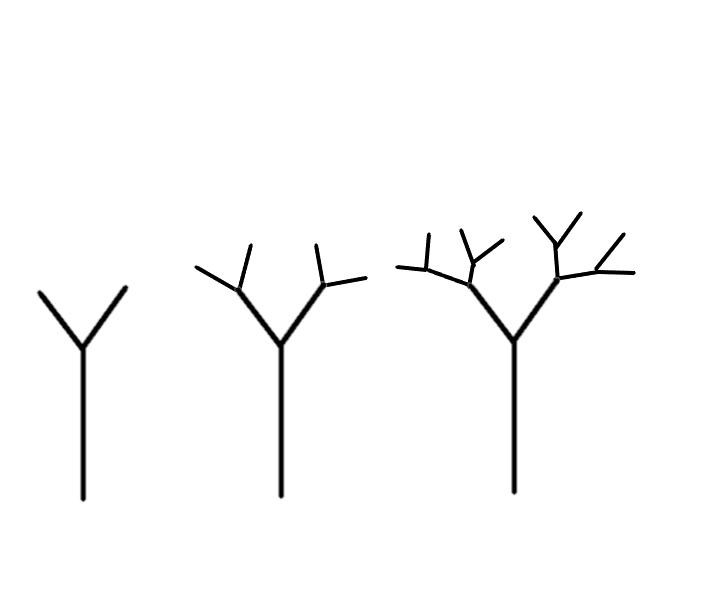

One of the most famous fractal patterns is called the Mandelbrot sequence:

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandelbrot_sequence_new.gif')

### What is Degree?

One of the most brasic properties of any node in a network ($n_i$) is its degree ($k_i$), defined as the number of edges that connect to the node.

Typically this is equivalent to the number of neighboring nodes (assuming there are no edges that create self-loops and there are not multiple edges between two nodes (i.e. in a multi-graph)).

In the case of directed networks we can distinguish between the input degree, or "indegree" ($k^{in}_i$) and the output degree or "outdegree" ($k^{out}_i$).

We can calculate the degree for each node in a network.


For our analysis, lets start by generating a random network.

The NetworkX function `gnm_random_graph` will generate a graph for you based on the number of nodes and edges you pass to the function (in that order).

Write the code to generate a network with 10 nodes and 20 edges.

In order to make our network reproducible (and compare with each other) we will set the random number generator to a specific number, you can do this by passing in a value for with the keyword `seed`- we will use the seed number 20160.

You can verify that your network is as expected using the functions we learned last time.

NetworkX has a built in method to calculate the the degree of any node. You can call the method `degree()` and pass in the ID of the node you are interested in.

And by giving no arguments to the method it will return a dictionary where the keys are the node IDs and the values are the node degrees.

### What is Degree Distribution?

The degree distribution requires you to look at **all** nodes in a network, rather than one at a time.

By looking at all nodes, we can ask what is the probability ($p(k)$) of a of a random node to having a degree equal to $k$.

The degree distribution has become one of the most prominent characteristics of network topology.

We typically visualize the degree distribution as a bar graph, where each bar represents a specific degree, and the height of the bar is the number of nodes with that degree or the probability of any node having that degree.

Here is an example of what that bar graph may look like for the graph we just generated.

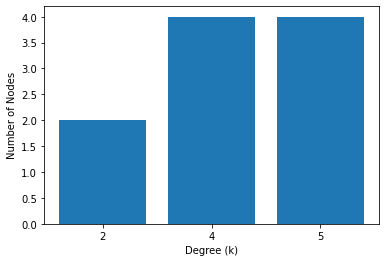

To generate this graph yourself, you will need to find the number of nodes that have each degree, and then plot a bar chart (Hint: use the `plt.bar()` function).

You'll now do the same on a real biological network! Each of the sections below has the code to read in a file to a NetworkX graph, it will be up to you to calculate the degree and plot the degree distribution.

## COVID Protein-Protein Interaction Network

In [ ]:
filename = os.path.join(filepath, 'HEK293T_SARS-CoV-2.cx')

In [ ]:
# Function for reading in the network file to networkx
def cx2graph(cx_file_name):

    cxjson = json.load(open(cx_file_name))

    name_from_id = {}
    for node in cxjson[3]['nodes']:
        name_from_id[node['@id']] = node['n']

    edge_list = []
    for edge in cxjson[4]['edges']:
        src_id = edge['s']
        src_name = name_from_id[src_id]
        tgt_id   = edge['t']
        tgt_name = name_from_id[tgt_id]
        edge_list.append([src_name, tgt_name])
  
    graph = nx.from_edgelist(edge_list, create_using=nx.Graph)
    return graph

In [ ]:
# Read in the network file
G = cx2graph(filename)

## *E. coli Transcription Factor Network*

In [ ]:
filename = os.path.join(filepath, 'network_tf_tf_lower_minimal.tsv')

In [ ]:
G = nx.read_edgelist(open(filename, "rb"), delimiter='\t', nodetype=str)

## Scale Free Networks

We've seen that our biological networks don't make normal distributions for the degree distribution, like our random graph did.

To see the "perfect" version of this distribution we will generate another graph using the function `barabasi_albert_graph`.

And now calculate and plot the degree distribution of this graph.